# Mounting the google drive

In [2]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing useful libraries and data reading

In [82]:
# Importing useful libraries

import numpy as np # For numerical computations
import pandas as pd # For dataframe related tasks

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression # For model training
from sklearn.model_selection import train_test_split # Fro train test splitting
from sklearn import metrics # For model evaluation

import pickle # For model saving

In [9]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data/'

In [10]:
# Reading the data

df = pd.read_csv(data_folder_path + 'medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data cleaning and visualization

In [16]:
# Lets see how many rows and columns our data has

df.shape

(1338, 7)

In [12]:
# Lets see the info about each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# Lets see statistical measures of the numerical columns

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
# Lets check for any missing value

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

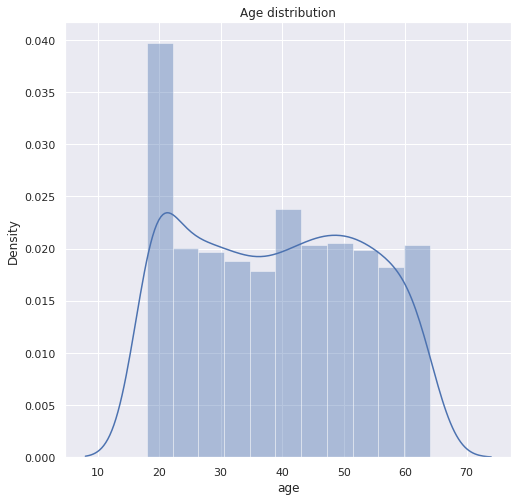

In [27]:
# Lets plot the age distribution in our dataset

sns.set()
plt.figure(figsize = (8,8))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

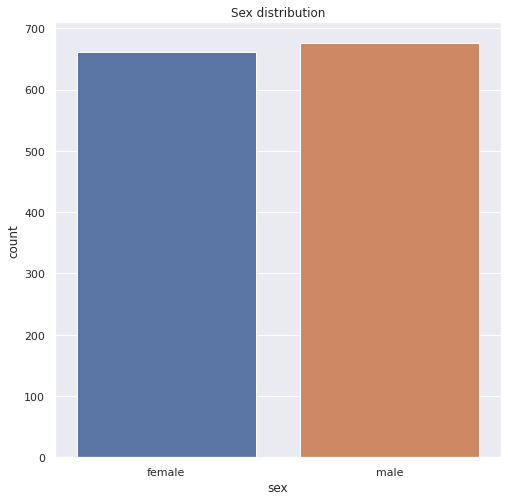

In [29]:
# Lets plot the number of male and females in our dataset

sns.set()
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'sex')
plt.title('Sex distribution')
plt.show()

In [31]:
# Lets see how many male and female are in the dataset

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

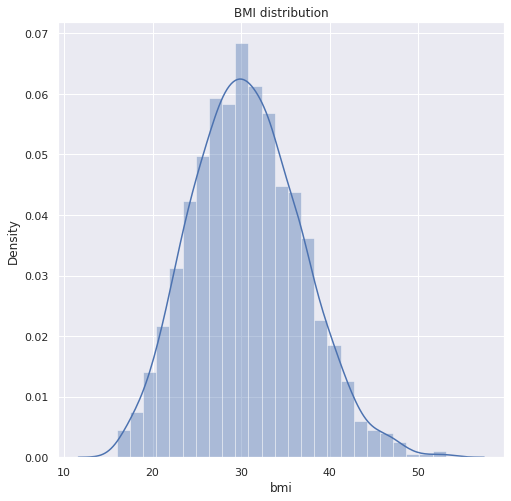

In [33]:
# Lets plot the bmi distribution in our dataset

sns.set()
plt.figure(figsize = (8,8))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

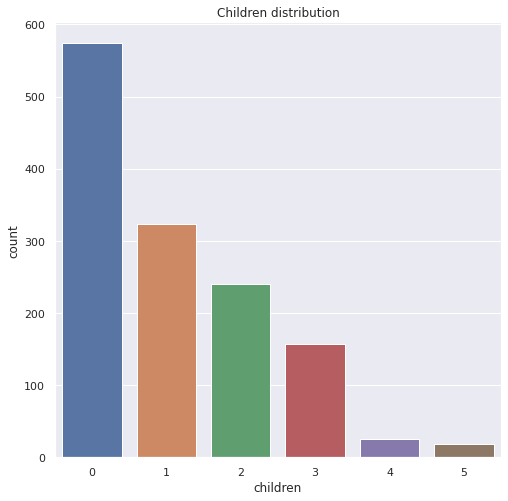

In [34]:
# Lets plot the number of children in the dataset

sns.set()
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'children')
plt.title('Children distribution')
plt.show()

In [35]:
# From the above we can see that most of the users has no child
# Lets see their count

df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

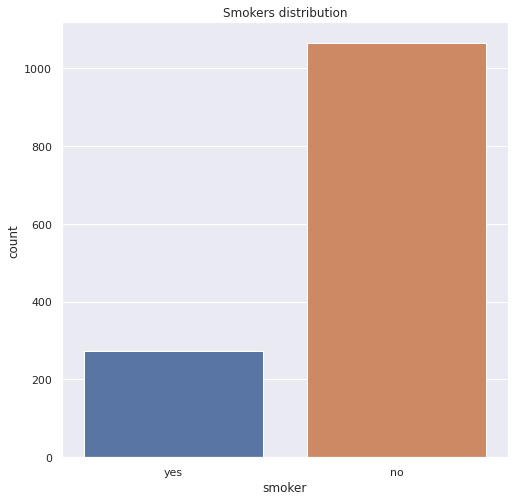

In [39]:
# Lets plot the number of smokers in the dataset

sns.set()
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'smoker')
plt.title('Smokers distribution')
plt.show()

In [40]:
# Lets see how many of the users are smokers

df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

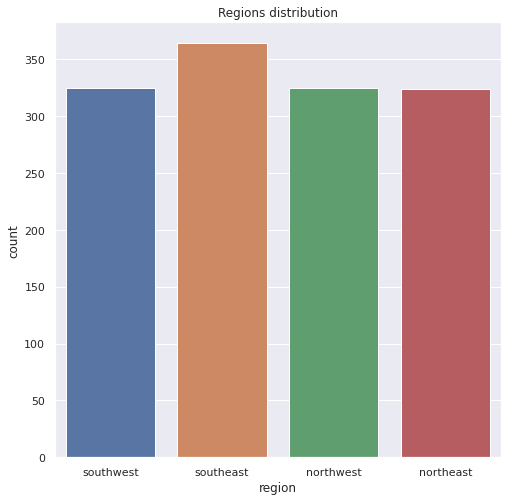

In [43]:
# Lets plot the number of regions in the dataset

sns.set()
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'region')
plt.title('Regions distribution')
plt.show()

In [44]:
# Lets see how many of each resgions are occuring in our dataset

df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

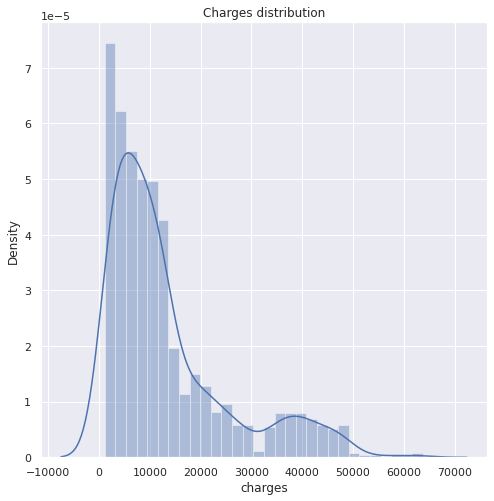

In [45]:
# Lets plot the charges distribution in our dataset

sns.set()
plt.figure(figsize = (8,8))
sns.distplot(df['charges'])
plt.title('Charges distribution')
plt.show()

# Data preprocesing

In [59]:
# Lets see which columns are non-numerical

categorical_cols = []
for column in list(df.columns):
  if df[column].dtype == 'O':
    categorical_cols.append(column)
categorical_cols

['sex', 'smoker', 'region']

In [66]:
# Encoding to change all the categorical columns into numerical

for col in categorical_cols:
  categories = list(df[col].value_counts().index)
  for i,category in enumerate(categories):
    df[col] = df[col].apply(lambda x:i if x == category else x)

In [68]:
# Lets see if they are changed succesfuly

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [71]:
# Now that we have all numerical columns let take the feature and target 

X = df.drop(columns = 'charges',axis=1)
y = df['charges']

In [72]:
# After getting the feature and targets now lets do the train test splition

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1
                                                 )

# Model training

In [74]:
# Instatiating the logistic regression model

lr = LinearRegression()

In [75]:
# Training the model

lr.fit(X_train,y_train)

LinearRegression()

# Model evaluation

In [79]:
# Lets see the training set accuracy

pred = lr.predict(X_train)
r2_score = metrics.r2_score(y_train,pred)
r2_score

0.7477189944705613

In [80]:
# Lets see the test set accuracy

pred = lr.predict(X_test)
r2_score = metrics.r2_score(y_test,pred)
r2_score

0.7621302054070109

# Saving the model

In [87]:
# Saving the model 

file_name = 'models/medical_insurance.h5'
with open(file_name,'wb') as f:
  pickle.dump(lr,f)